# RETRIEVAL

Many large language model (LLM) applications enhance their functionality by incorporating user-specific data that was not included in their initial training sets.
The primary method for this integration is through Retrieval Augmented Generation (RAG), a process that involves retrieving external data and feeding it into the LLM during the generation phase.


LangChain offers a comprehensive suite of tools that support the development and implementation of RAG, catering to both simple and complex retrieval needs.
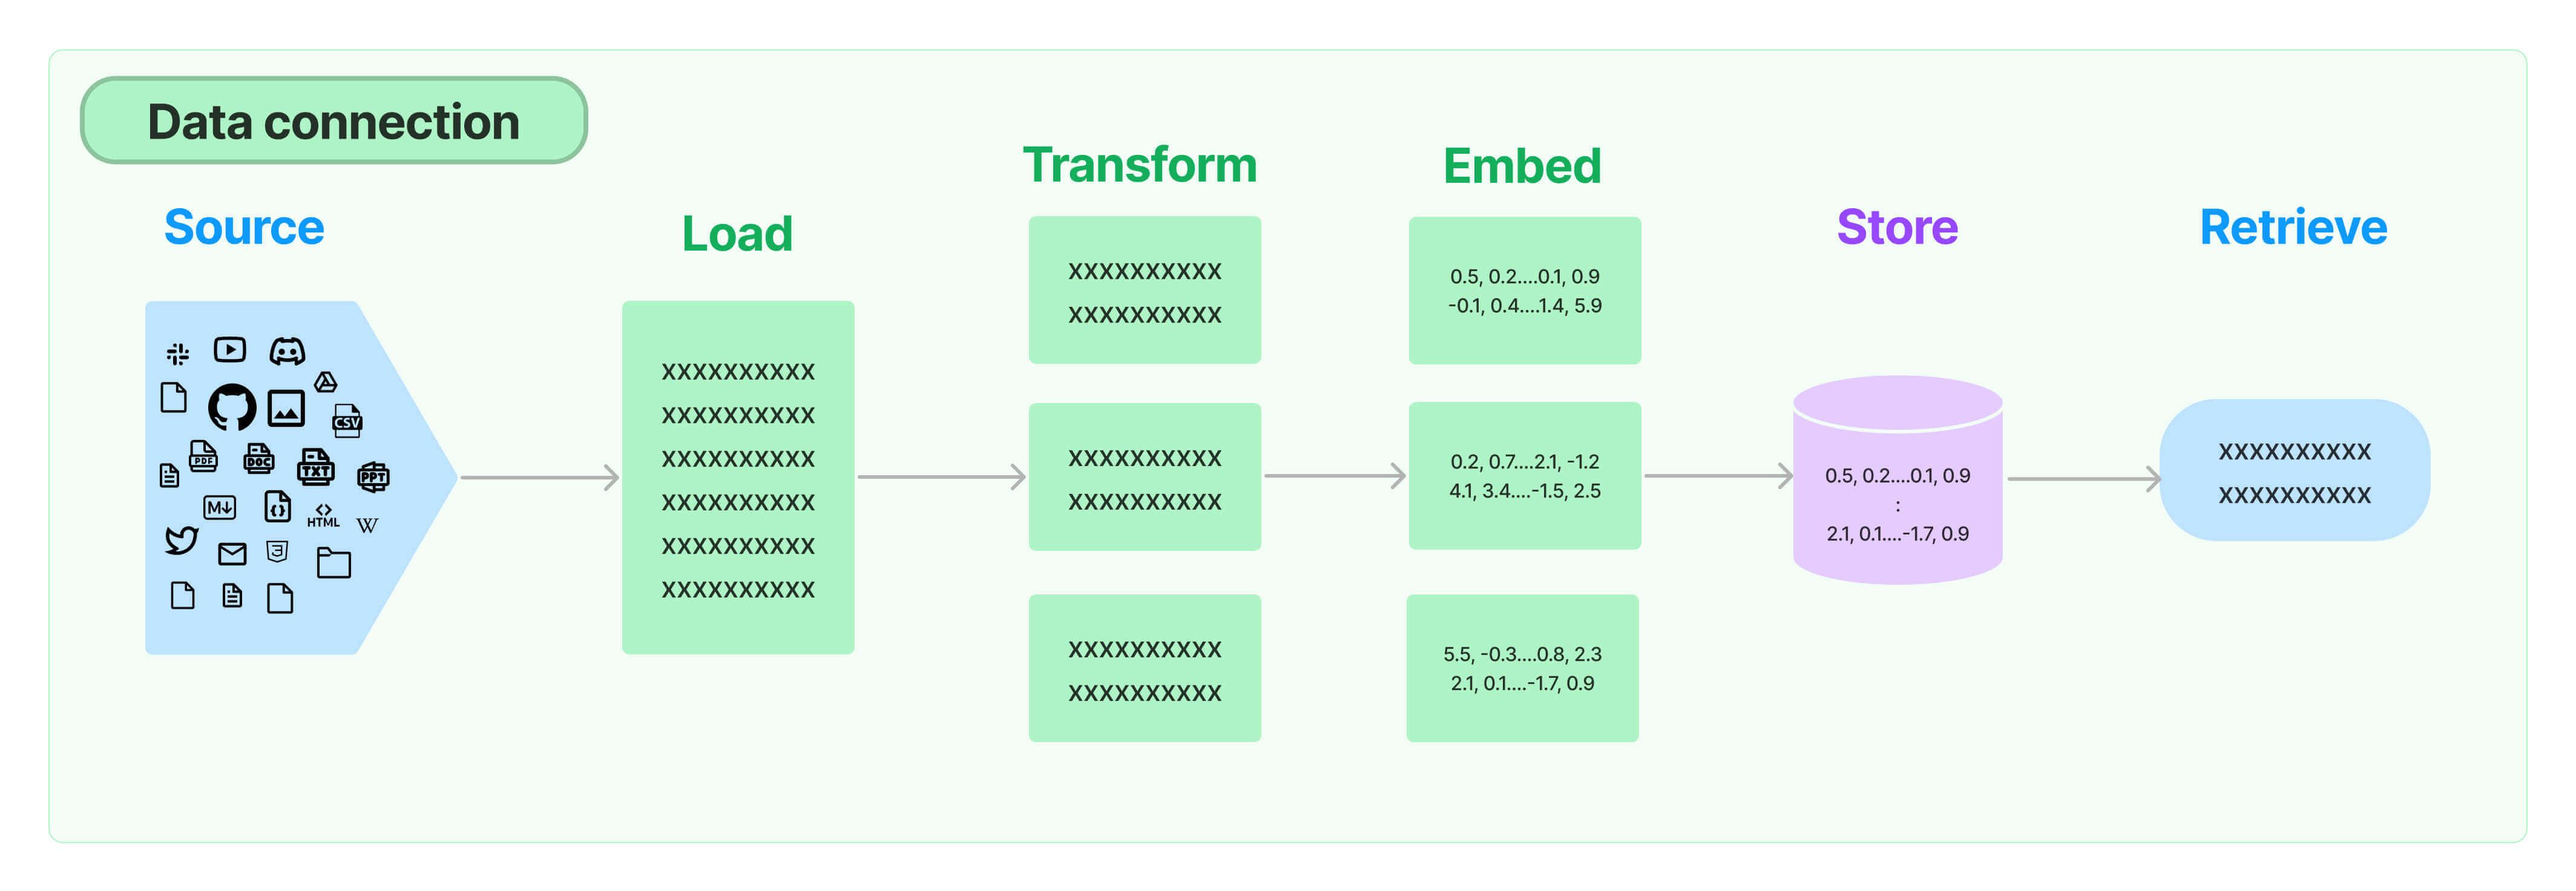

## 1. Document loaders

- Document loaders load documents from many different sources.
- Langchain provides over 100 document loaders.
- LangChain provides integrations to load all types of documents (HTML, PDF, code) from all types of locations (private S3 buckets, public websites).

### Text

In [1]:
#Loading a document from  txt file 

from langchain_community.document_loaders import TextLoader 
loader = TextLoader(r".\Data\Lincoln_State_of_Union_1862.txt")
output=loader.load()
print(output[0].page_content[:1000]) #Printed first 1000 work for viewbility

Fellow-Citizens of the Senate and House of Representatives:

Since your last annual assembling another year of health and bountiful harvests has passed, and while it has not pleased the Almighty to bless us with a return of peace, we can but press on, guided by the best light He gives us, trusting that in His own good time and wise way all will yet be well.

The correspondence touching foreign affairs which has taken place during the last year is herewith submitted, in virtual compliance with a request to that effect made by the House of Representatives near the close of the last session of Congress. If the condition of our relations with other nations is less gratifying than it has usually been at former periods, it is certainly more satisfactory than a nation so unhappily distracted as we are might reasonably have apprehended. In the month of June last there were some grounds to expect that the maritime powers which at the beginning of our domestic difficulties so unwisely and unnece

### PDF 

In [2]:
"""Pre requiste package"""
#!pip install pypdf2

'Pre requiste package'

In [3]:
#Loading a document from  pdf file 

from langchain_community.document_loaders.pdf import PyPDFLoader
loader = PyPDFLoader(r".\Data\Machine learning - Wikipedia_1page.pdf")
output=loader.load()
print(output[0].page_content)

Machine learning
Machine learning  (ML) is a field of study  in artificial intelligence  concern ed with the
development and study of statistical algorithms  that can learn from data  and generalize  to unsee n
data, and thus perform tasks  without explicit instructions .[1] Recently, artificial neural networks
have been able to surpass many previous approaches in performance.[2][3]
Machine learning  approaches have been applied to many fields including natural language
processing , computer vision , speech recognition , email filtering , agriculture , and medicine.[4][5]
ML is known in its application across business problems under the name predictive analytics .
Although not all machine learning is statistically  based, computational statistics  is an important
source of the field's methods.
The math ematical foundations of ML are provided by mathematical optimization  (mathematical
programming) methods. Data mining  is a related (paral lel) field of study,  focusing on exploratory
d

### Other PDF Alternatives
| Class | Details
|---|---|
|document_loaders.pdf.PyPDFium2Loader|Load PDF using pypdfium2 and chunks at character level|
|document_loaders.pdf.PyMuPDFLoader(file_path)| Load PDF files using PyMuPDF.|
|document_loaders.pdf.PDFMinerPDFasHTMLLoader|Load PDF files as HTML content using PDFMiner.|




### CSV

In [52]:
from langchain_community.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path='./data/penguins.csv')
data = loader.load()
print(data)

[Document(page_content='species: Adelie\nisland: Torgersen\nbill_length_mm: 39.1\nbill_depth_mm: 18.7\nflipper_length_mm: 181\nbody_mass_g: 3750\nsex: MALE', metadata={'source': './data/penguins.csv', 'row': 0}), Document(page_content='species: Adelie\nisland: Torgersen\nbill_length_mm: 39.5\nbill_depth_mm: 17.4\nflipper_length_mm: 186\nbody_mass_g: 3800\nsex: FEMALE', metadata={'source': './data/penguins.csv', 'row': 1}), Document(page_content='species: Adelie\nisland: Torgersen\nbill_length_mm: 40.3\nbill_depth_mm: 18\nflipper_length_mm: 195\nbody_mass_g: 3250\nsex: FEMALE', metadata={'source': './data/penguins.csv', 'row': 2}), Document(page_content='species: Adelie\nisland: Torgersen\nbill_length_mm: \nbill_depth_mm: \nflipper_length_mm: \nbody_mass_g: \nsex: ', metadata={'source': './data/penguins.csv', 'row': 3}), Document(page_content='species: Adelie\nisland: Torgersen\nbill_length_mm: 36.7\nbill_depth_mm: 19.3\nflipper_length_mm: 193\nbody_mass_g: 3450\nsex: FEMALE', metadata=

In [5]:
#Row Number 1 details
print(data[0].page_content)

species: Adelie
island: Torgersen
bill_length_mm: 39.1
bill_depth_mm: 18.7
flipper_length_mm: 181
body_mass_g: 3750
sex: MALE


### HTML

In [53]:
from langchain_community.document_loaders.html import UnstructuredHTMLLoader
loader = UnstructuredHTMLLoader(".\Data\some_website.html")
data = loader.load()
data

[Document(page_content='Heading 1', metadata={'source': '.\\Data\\some_website.html'})]

### Other HTML Alternatives
| Class | Details
|---|---|
|document_loaders.parsers.html.bs4.BS4HTMLParser|Pparse HTML files using Beautiful Soup.|



### External Sources

In [54]:
# From External Sources
from langchain_community.document_loaders import HNLoader
loader=HNLoader("https://news.ycombinator.com/item?id=36725982")
data=loader.load()n
data

[Document(page_content="moonchrome 9 months ago  \n             | next [–] \n\nI'm in the exact same spot as the author just a few days in instead of months.Frankly I could see langchain is garbage software just by looking at the code.It still helps me get shit done fast to figure out how things are supposed to work. Sort of a cookbook of AI recepies. Once I have an approach narrowed down I'll rewrite everything on top of stuff langchain is supposedly wrapping. For now it's faster than tracking down individual libraries and learning the apis. It will stay in notebooks basically.", metadata={'source': 'https://news.ycombinator.com/item?id=36725982', 'title': 'The Problem with LangChain'}),
 Document(page_content="saulpw 9 months ago  \n             | parent | next [–] \n\nYes! This is why I started working on AIPL.  The scripts are much more like recipes (linear, contained in a single-file, self-evident even to people who don't know the language).  For instance, here's a multi-level sum

In [56]:
data[1].page_content

"saulpw 9 months ago  \n             | parent | next [–] \n\nYes! This is why I started working on AIPL.  The scripts are much more like recipes (linear, contained in a single-file, self-evident even to people who don't know the language).  For instance, here's a multi-level summarizer of a webpage: https://github.com/saulpw/aipl/blob/develop/examples/summari...The goal is to capture all that knowledge that langchain has, into consistent legos that you can combine and parameterize with the prompts, without all the complexity and boilerplate of langchain, nor having to learn all the Python libraries and their APIs.  Perfect for prototypes and experiments (like a notebook, as you suggest), and then if you find something that really works, you can hand-off a single text file to an engineer and they can make it work in a production environment."

### Major External Source
| Class | Details
|---|---|
|document_loaders.tensorflow_datasets.TensorflowDatasetLoader|Load from TensorFlow Dataset.|
|document_loaders.github.GithubFileLoader|Load GitHub File|

## 2. Text Splitters

- Langchain provides Document Transformers that allow you to easily split strings from Document page_content into chunks.

- These chunks will then later serve as useful components for embeddings, which we can then look up using a distance similarity later on.
- The two most common splitters:
    - Splitting on a Specific Character
    - Splitting based on Token Counts


### i. Split by Character

In [57]:
loader=TextLoader(r".\Data\FDR_State_of_Union_1944.txt")
documents=loader.load()

In [58]:
with open(r".\Data\FDR_State_of_Union_1944.txt") as f:
    docs=f.read()

In [11]:
docs

'This Nation in the past two years has become an active partner in the world\'s greatest war against human slavery.\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\nBut I do not think that any of us Americans can be content with mere survival. Sacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash.\n\nWhen Mr. Hull went to Moscow in October, and when I went to Cairo and Teheran in November, we knew that we were in agreement with our allies in o

In [59]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(separator="\n\n",chunk_size=1000) #1000 is default value
docs=text_splitter.split_documents(documents)
docs[0]

Document(page_content="This Nation in the past two years has become an active partner in the world's greatest war against human slavery.\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\nBut I do not think that any of us Americans can be content with mere survival. Sacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash.", metadata={'source': '.\\Data\\FDR_State_of_Union_1944.txt'})

### Recursive character text splitter
This text splitter is the recommended one for generic text.  
- It is parameterized by a list of characters. 
- It tries to split on them in order until the chunks are small enough. 
- The default list is ["\n\n", "\n", " ", ""]. 
- This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.

In [61]:
#Split using RecursiveCharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=20,length_function=len,
                                               is_separator_regex=False,) #1000 is default value
docs=text_splitter.split_documents(documents)
docs[0]

Document(page_content="This Nation in the past two years has become an active partner in the world's greatest war against human slavery.\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\nBut I do not think that any of us Americans can be content with mere survival. Sacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash.", metadata={'source': '.\\Data\\FDR_State_of_Union_1944.txt'})

### ii. Split by tokens

### Split using tiktoken chunks

In [8]:
#!pip install tiktoken

In [62]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter=CharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap=50)
docs=text_splitter.split_documents(documents)
docs[0]

Document(page_content='This Nation in the past two years has become an active partner in the world\'s greatest war against human slavery.\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\nBut I do not think that any of us Americans can be content with mere survival. Sacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash.\n\nWhen Mr. Hull went to Moscow in October, and when I went to Cairo and Teheran in November, we knew that we were in agreemen

### Split using Spacy Tokens

In [14]:
#!pip install spacy

In [15]:
from langchain_text_splitters import SpacyTextSplitter
text_splitter = SpacyTextSplitter(chunk_size=1000)
docs = text_splitter.split_documents(documents)
print(docs[0])

page_content="This Nation in the past two years has become an active partner in the world's greatest war against human slavery.\n\n\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\n\n\nBut I do not think that any of us Americans can be content with mere survival.\n\nSacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\n\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash." metadata={'source': '.\\Data\\FDR_State_of_Union_1944.txt'}


C:\Users\ankit\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


### Split using Hugging face tokeniser

In [63]:
from transformers import GPT2TokenizerFast

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

text_splitter = CharacterTextSplitter.from_huggingface_tokenizer(
    tokenizer, chunk_size=1000, chunk_overlap=0
)
texts = text_splitter.split_documents(documents)
print(texts[0])

page_content='This Nation in the past two years has become an active partner in the world\'s greatest war against human slavery.\n\nWe have joined with like-minded people in order to defend ourselves in a world that has been gravely threatened with gangster rule.\n\nBut I do not think that any of us Americans can be content with mere survival. Sacrifices that we and our allies are making impose upon us all a sacred obligation to see to it that out of this war we and our children will gain something better than mere survival.\n\nWe are united in determination that this war shall not be followed by another interim which leads to new disaster- that we shall not repeat the tragic errors of ostrich isolationismâ€”that we shall not repeat the excesses of the wild twenties when this Nation went for a joy ride on a roller coaster which ended in a tragic crash.\n\nWhen Mr. Hull went to Moscow in October, and when I went to Cairo and Teheran in November, we knew that we were in agreement with ou

# 3. Embedding Models

- The Embeddings class is a class designed for interfacing with text embedding models.
- There are lots of embedding model providers (OpenAI, Cohere, Hugging Face, etc) - this class is designed to provide a standard interface for all of them.



In [17]:
# pip install langchain-openai

In [64]:
import os
with open(r"C:\Users\ankit\OneDrive\Desktop\OPEN_AI_API_KEY.txt",'r') as f: # OPENAI API key
    os.environ['OPENAI_API_KEY'] = f.read()

In [19]:
from langchain.document_loaders import CSVLoader
from langchain_openai import OpenAIEmbeddings

embeddings=OpenAIEmbeddings()


### Embedding Text

In [65]:
text = "Some normal text to send to OpenAI to be embedded into a N dimensional vector"

embedded_text = embeddings.embed_query(text)
len(embedded_text)

1536

In [21]:
print(embedded_text[:5])

[-0.010118913173921504, -0.003974512324877582, 0.003328970721768745, 0.023449261363609194, 0.02278382950374658]


### Embed Documents

In [67]:
embeddings_docs = embeddings.embed_documents(
    [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]
)
len(embeddings_docs), len(embeddings_docs[0])

(5, 1536)

### Caching

- Embeddings can be stored or temporarily cached to avoid needing to recompute them.
- Caching embeddings can be done using a CacheBackedEmbeddings. 
- The cache backed embedder is a wrapper around an embedder that caches embeddings in a key-value store. 
- underlying_embedder: The embedder to use for embedding.
- document_embedding_cache: Any ByteStore for caching document embeddings.
- batch_size: (optional, defaults to None) The number of documents to embed between store updates.
- namespace: (optional, defaults to "") The namespace to use for document cache.

In [23]:
from langchain.embeddings import CacheBackedEmbeddings

First, let’s see an example that uses the local file system for storing embeddings and uses FAISS vector store for retrieval.

In [24]:
from langchain.storage import LocalFileStore
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

underlying_embeddings = OpenAIEmbeddings()

store = LocalFileStore("./cache/")

cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

In [25]:
list(store.yield_keys())

['text-embedding-ada-002164fc1f4-881f-52ba-a998-bc37227a1a4c',
 'text-embedding-ada-002219f962f-9d13-561c-bc90-086413a9e176',
 'text-embedding-ada-002297d2d2e-f948-51c8-9326-a52053302555',
 'text-embedding-ada-00231eeeb0d-0fe2-5b3f-b8a2-9f70fb7f7f06',
 'text-embedding-ada-00233fd0251-a00d-5a32-a684-999611ca14c7',
 'text-embedding-ada-0023a55efcf-71c5-5c61-b294-8d4f8af9af6e',
 'text-embedding-ada-0023c0c829c-b21d-5bf0-aa6d-dd2b14a3d878',
 'text-embedding-ada-00242194b66-9116-59c9-aa59-37f99e149f7d',
 'text-embedding-ada-00244f79fd0-d0ac-585c-9dc3-b6a2e1ab7ae8',
 'text-embedding-ada-0024804a923-67ab-5a67-af1e-3a91e79ce810',
 'text-embedding-ada-0024fddb4c2-2f0c-58d6-9b5d-aee58d403726',
 'text-embedding-ada-00255c79aa7-a7e1-57e2-b003-1476c34231f0',
 'text-embedding-ada-00262e2f23a-cfde-5b97-adbe-fdf348c861ba',
 'text-embedding-ada-002654ad29c-7137-5a12-b3ee-08811d4313c2',
 'text-embedding-ada-0026de120bb-4228-5fb7-b12c-0042a04899aa',
 'text-embedding-ada-0028fefd724-0894-5b0a-b24b-36f498f

In [26]:
raw_documents = TextLoader(r".\Data\FDR_State_of_Union_1944.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

In [27]:
# !pip install faiss-cpu

In [28]:
%%time
db = FAISS.from_documents(documents, cached_embedder)

CPU times: total: 15.6 ms
Wall time: 2.13 s


In [34]:
%%time

#Create the vector store again, it’ll be much faster 
db2 = FAISS.from_documents(documents, cached_embedder)

CPU times: total: 0 ns
Wall time: 23.5 ms


In [37]:
list(store.yield_keys())[:5]

['text-embedding-ada-002164fc1f4-881f-52ba-a998-bc37227a1a4c',
 'text-embedding-ada-002219f962f-9d13-561c-bc90-086413a9e176',
 'text-embedding-ada-002297d2d2e-f948-51c8-9326-a52053302555',
 'text-embedding-ada-00231eeeb0d-0fe2-5b3f-b8a2-9f70fb7f7f06',
 'text-embedding-ada-00233fd0251-a00d-5a32-a684-999611ca14c7']

# 4. Vector Store

Common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search

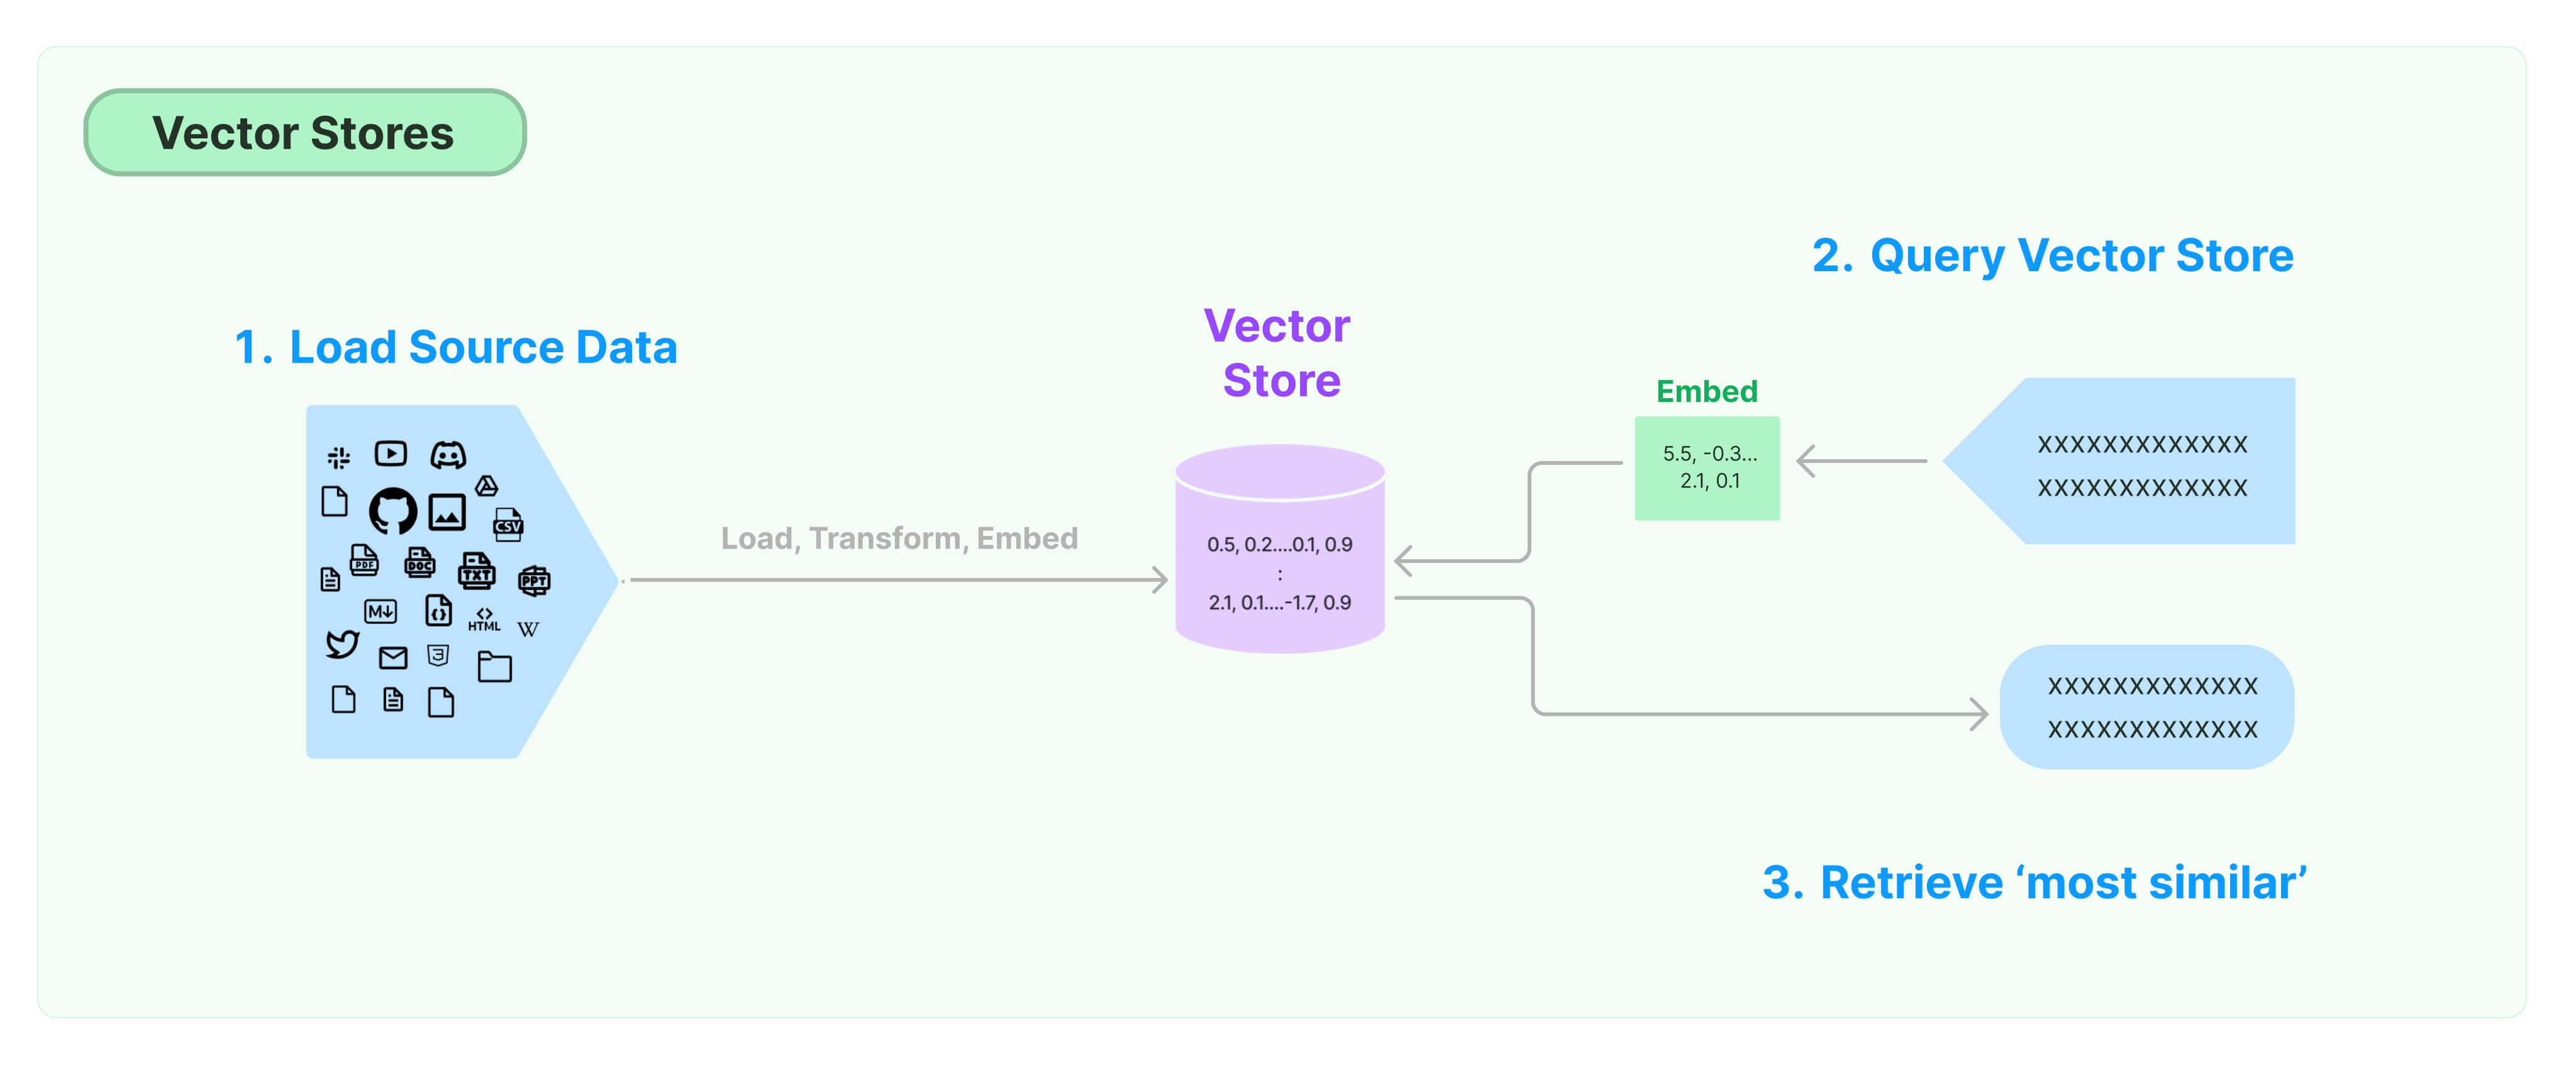

In [38]:
# Vector Store using Chroma

In [39]:
#!pip install langchain-chroma

In [69]:
import os 
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter

loader=TextLoader(r"D:\Study Material\Langchain\LangChainNotebooks-UNZIP-ME\LangChainNotebooks-UNZIP-ME\01-Data-Connections\some_data\FDR_State_of_Union_1944.txt")
documents=loader.load()

embedding_function=OpenAIEmbeddings()

text_splitter=CharacterTextSplitter.from_tiktoken_encoder(chunk_size=300,chunk_overlap=10)
docs=text_splitter.split_documents(documents)

db=Chroma.from_documents(docs,embedding_function,persist_directory=r".\Chroma_store")

In [70]:
new_doc="What did FDR say about the cost of food law?"
new_doc2="Lincoln"

db.similarity_search(new_doc,k=1)[0].page_content

'(3) A cost of food lawâ€”which will enable the Government (a) to place a reasonable floor under the prices the farmer may expect for his production; and (b) to place a ceiling on the prices a consumer will have to pay for the food he buys. This should apply to necessities only; and will require public funds to carry out. It will cost in appropriations about one percent of the present annual cost of the war.'

In [71]:
#TO restore the Stored Database
db_new=Chroma(persist_directory=r".\Chroma_store",embedding_function=embedding_function)

In [43]:
loader2=TextLoader(r".\Data\Lincoln_State_of_Union_1862.txt")
documents2=loader2.load()
text_splitter2=CharacterTextSplitter.from_tiktoken_encoder(chunk_size=400,chunk_overlap=10)
docs2=text_splitter2.split_documents(documents2)

Created a chunk of size 611, which is longer than the specified 400
Created a chunk of size 539, which is longer than the specified 400
Created a chunk of size 423, which is longer than the specified 400
Created a chunk of size 434, which is longer than the specified 400
Created a chunk of size 434, which is longer than the specified 400
Created a chunk of size 686, which is longer than the specified 400


In [44]:
#Add new embedding in existing database
db_new_file=Chroma.from_documents(docs2,embedding_function,persist_directory=r"C:\Users\ankit\Langchain\Chroma_store")

In [45]:
new_doc2="slavery"
db_new.similarity_search(new_doc2,k=2)

[Document(page_content='I beg indulgence to discuss these proposed articles at some length. Without slavery the rebellion could never have existed; without slavery it could not continue.', metadata={'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\Lincoln_State_of_Union_1862.txt'}),
 Document(page_content='I beg indulgence to discuss these proposed articles at some length. Without slavery the rebellion could never have existed; without slavery it could not continue.', metadata={'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\Lincoln_State_of_Union_1862.txt'})]

In [46]:
db_new.get()['metadatas']

[{'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\Lincoln_State_of_Union_1862.txt'},
 {'source': '.\\Data\\Lincoln_State_of_Union_1862.txt'},
 {'source': '.\\Data\\Lincoln_State_of_Union_1862.txt'},
 {'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\Lincoln_State_of_Union_1862.txt'},
 {'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\FDR_State_of_Union_1944.txt'},
 {'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\FDR_State_of_Union_1944.txt'},
 {'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\FDR_State_of_Union_1944.txt'},
 {'source': '.\\Data\\Lincoln_State_of_Union_1862.txt

# 5.Retrievers

A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them

### i. MultiQuery Retriever

- Sometimes the documents in your vector store may contain phrasing that you are not aware of, due to their size. This can cause issues in trying to think of the correct query string for similarity comparisons.
- We can use an LLM to generate multiple variations of our query using MultiQueryRetriever, allowing us to focus on key ideas rather than exact phrasing.
- The MultiQueryRetriever automates the process of prompt tuning by using an LLM to generate multiple queries from different perspectives for a given user input query. For each query, it retrieves a set of relevant documents and takes the unique union across all queries to get a larger set of potentially relevant documents

In [72]:
from langchain_openai import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever
llm=ChatOpenAI() 
retriever_from_llm = MultiQueryRetriever.from_llm(retriever=db.as_retriever(),llm=llm)

#Logging Behind Scenes
import logging
logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

question="When was this disclassified?"
unique_docs=retriever_from_llm.get_relevant_documents(query=question)

print(unique_docs)

INFO:langchain.retrievers.multi_query:Generated queries: ['1. What is the date of declassification for this information?', '2. Can you provide the declassification date for this document?', '3. When was the classification removed from this?']


[Document(page_content='(4) Early reenactment of. the stabilization statute of October, 1942. This expires June 30, 1944, and if it is not extended well in advance, the country might just as well expect price chaos by summer.', metadata={'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\FDR_State_of_Union_1944.txt'}), Document(page_content='On the 22d day of September last a proclamation was issued by the Executive, a copy of which is herewith submitted. In accordance with the purpose expressed in the second paragraph of that paper, I now respectfully recall your attention to what may be', metadata={'source': 'D:\\Study Material\\Langchain\\LangChainNotebooks-UNZIP-ME\\LangChainNotebooks-UNZIP-ME\\01-Data-Connections\\some_data\\Lincoln_State_of_Union_1862.txt'}), Document(page_content='As to the second article, I think it would be impracticable to return to bondage the class of persons therein contemplat

### ii. Context Compression

Challenge with retrieval is that usually you don’t know the specific queries your document storage system will face when you ingest data into the system. This means that the information most relevant to a query may be buried in a document with a lot of irrelevant text. Passing that full document through your application can lead to more expensive LLM calls and poorer responses.

Contextual compression is meant to fix this. The idea is simple: instead of immediately returning retrieved documents as-is, you can compress them using the context of the given query, so that only the relevant information is returned.

The Contextual Compression Retriever passes queries to the base retriever, takes the initial documents and passes them through the Document Compressor. The Document Compressor takes a list of documents and shortens it by reducing the contents of documents or dropping documents altogether.

In [88]:
from langchain_chroma import Chroma
from langchain_community.document_loaders import WikipediaLoader
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.retrievers import ContextualCompressionRetriever

embd=OpenAIEmbeddings()
db_connect=Chroma(persist_directory=r"C:\Users\ankit\Langchain\some_new_mkultra",embedding_function=embd)

llm=ChatOpenAI(temperature=0)

compressor=LLMChainExtractor.from_llm(llm)


#docs=db_connect.similarity_search("What was this disclassified",k=3)

compressor_retriever =ContextualCompressionRetriever(base_compressor=compressor,base_retriever=db_connect.as_retriever())
compress_docs=compressor_retriever.get_relevant_documents("When was this disclassified")

In [89]:
print(docs[0].page_content)

== Background ==
By the early years of the 1970s, a series of troubling revelations had appeared in the press concerning intelligence activities. First came the revelations by Army intelligence officer Christopher Pyle in January 1970 of the US Army's spying on the civilian population and Senator Sam Ervin's Senate investigations produced more revelations. Then on December 22, 1974, The New York Times published a lengthy article by Seymour Hersh detailing operations engaged in by the CIA over the years that had been dubbed the "family jewels". Covert action programs involving assassination attempts on foreign leaders and covert attempts to subvert foreign governments were reported for the first time. In addition, the article discussed efforts by intelligence agencies to collect information on the political activities of US citizens.The creation of the Church Committee was approved on January 27, 1975, by a vote of 82 to 4 in the Senate.


In [91]:
docs[0].page_content

'== Background ==\nBy the early years of the 1970s, a series of troubling revelations had appeared in the press concerning intelligence activities. First came the revelations by Army intelligence officer Christopher Pyle in January 1970 of the US Army\'s spying on the civilian population and Senator Sam Ervin\'s Senate investigations produced more revelations. Then on December 22, 1974, The New York Times published a lengthy article by Seymour Hersh detailing operations engaged in by the CIA over the years that had been dubbed the "family jewels". Covert action programs involving assassination attempts on foreign leaders and covert attempts to subvert foreign governments were reported for the first time. In addition, the article discussed efforts by intelligence agencies to collect information on the political activities of US citizens.The creation of the Church Committee was approved on January 27, 1975, by a vote of 82 to 4 in the Senate.'

In [92]:
docs[1].page_content

'== Background ==\nBy the early years of the 1970s, a series of troubling revelations had appeared in the press concerning intelligence activities. First came the revelations by Army intelligence officer Christopher Pyle in January 1970 of the US Army\'s spying on the civilian population and Senator Sam Ervin\'s Senate investigations produced more revelations. Then on December 22, 1974, The New York Times published a lengthy article by Seymour Hersh detailing operations engaged in by the CIA over the years that had been dubbed the "family jewels". Covert action programs involving assassination attempts on foreign leaders and covert attempts to subvert foreign governments were reported for the first time. In addition, the article discussed efforts by intelligence agencies to collect information on the political activities of US citizens.The creation of the Church Committee was approved on January 27, 1975, by a vote of 82 to 4 in the Senate.'

In [86]:
len(compress_docs)

3

In [49]:
compress_docs[0].page_content

'December 22, 1974'

In [50]:
compress_docs[0].metadata['summary']

'The Church Committee (formally the United States Senate Select Committee to Study Governmental Operations with Respect to Intelligence Activities) was a US Senate select committee in 1975 that  investigated abuses by the Central Intelligence Agency (CIA), National Security Agency (NSA), Federal Bureau of Investigation (FBI), and the Internal Revenue Service (IRS). Chaired by Idaho Senator Frank Church (D-ID), the committee was part of a series of investigations into intelligence abuses in 1975, dubbed the "Year of Intelligence", including its House counterpart, the Pike Committee, and the presidential Rockefeller Commission. The committee\'s efforts led to the establishment of the permanent US Senate Select Committee on Intelligence.\nThe most shocking revelations of the committee include Operation MKULTRA, which involved the drugging and torture of unwitting US citizens as part of human experimentation on mind control; COINTELPRO, which involved the surveillance and infiltration of A